In [19]:
import squidpy as sq
import scanpy as sc
import skimage
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

In [20]:
# load data
img = sq.datasets.visium_hne_image_crop()
adata = sq.datasets.visium_hne_adata_crop()

In [23]:
sq.im.process?

Signature:
sq.im.process(
    img: squidpy.im._container.ImageContainer,
    layer: Union[str, NoneType] = None,
    method: Union[str, Callable[..., numpy.ndarray]] = 'smooth',
    size: Union[Tuple[int, int], NoneType] = None,
    layer_added: Union[str, NoneType] = None,
    channel_dim: Union[str, NoneType] = None,
    copy: bool = False,
    **kwargs: Any,
) -> Union[squidpy.im._container.ImageContainer, NoneType]
Docstring:
Process an image by applying a transformation.

Note that crop-wise processing can save memory but may change behaviour of cropping if global statistics are used.
Leave ``size = None`` in order to process the full image in one go.

Parameters
----------
img
    High-resolution image.
layer
    Image layer in ``img`` that should be processed. If `None` and only 1 layer is present, it will be selected.
method
    Processing method to use. Valid options are:

        - `'smooth'` - :func:`skimage.filters.gaussian`.
        - `'gray'` - :func:`skimage.color.rgb2gr

In [41]:
# define workflow
def time_image_workflow(img, adata, n_jobs=1):
    start = time.time()
    #sq.im.process(img, method="smooth", sigma=2)
    sq.im.segment(img, layer="image", method="watershed", thresh=None, n_jobs=n_jobs, size=2000)
    sq.im.calculate_image_features(adata,img,layer="image",key_added='features', 
                               features=['summary', 'histogram'],
                               n_jobs=n_jobs, 
                               spot_scale=1, 
                               scale=1.0, 
                               mask_circle=True)
    end = time.time()
    return end - start

In [46]:
res = []

In [47]:
# calculate execution time for different datasets

dataset = 'fluo_crop'
img = sq.datasets.visium_fluo_image_crop()
adata = sq.datasets.visium_fluo_adata_crop()
for run in range(3):
    for n_jobs in [1,2,3,4]:
        duration = time_image_workflow(img, adata, n_jobs=n_jobs)
        res_dict = {
            'dataset': dataset,
            'n_pixels': img['image'].size,
            'shape': str(img['image'].shape),
            'n_jobs': n_jobs,
            'run': run,
            'time': duration,
        }
        res.append(res_dict)

In [48]:
dataset = 'hne_crop'
img = sq.datasets.visium_hne_image_crop()
adata = sq.datasets.visium_hne_adata_crop()
for run in range(3):
    for n_jobs in [1,2,3,4]:
        duration = time_image_workflow(img, adata, n_jobs=n_jobs)
        res_dict = {
            'dataset': dataset,
            'n_pixels': img['image'].size,
            'shape': str(img['image'].shape),
            'n_jobs': n_jobs,
            'run': run,
            'time': duration,
        }
        res.append(res_dict)

In [49]:
dataset = 'hne'
img = sq.datasets.visium_hne_image()
adata = sq.datasets.visium_hne_adata()
for run in range(3):
    for n_jobs in [1,2,3,4]:
        duration = time_image_workflow(img, adata, n_jobs=n_jobs)
        res_dict = {
            'dataset': dataset,
            'n_pixels': img['image'].size,
            'shape': str(img['image'].shape),
            'n_jobs': n_jobs,
            'run': run,
            'time': duration,
        }
        res.append(res_dict)

In [50]:
df = pd.DataFrame(res)

In [54]:
df

,dataset,n_pixels,shape,n_jobs,run,time
0,fluo_crop,158645952,"(7272, 7272, 3)",1,0,44.377279
1,fluo_crop,158645952,"(7272, 7272, 3)",2,0,37.543131
2,fluo_crop,158645952,"(7272, 7272, 3)",3,0,28.578280
3,fluo_crop,158645952,"(7272, 7272, 3)",4,0,20.971453
4,fluo_crop,158645952,"(7272, 7272, 3)",1,1,34.850302
5,fluo_crop,158645952,"(7272, 7272, 3)",2,1,31.588291
6,fluo_crop,158645952,"(7272, 7272, 3)",3,1,29.627136
7,fluo_crop,158645952,"(7272, 7272, 3)",4,1,24.723751
8,fluo_crop,158645952,"(7272, 7272, 3)",1,2,35.376295
9,fluo_crop,158645952,"(7272, 7272, 3)",2,2,32.446921


In [51]:
df.to_csv('figures/feature_extraction_benchmark.csv')

In [95]:
df_grouped = df.groupby(['dataset','n_jobs']).mean().reset_index(drop=False)

In [91]:
df_grouped

,dataset,n_jobs,n_pixels,run,time
0,fluo_crop,1,158645952,1,38.201292
1,fluo_crop,2,158645952,1,33.859448
2,fluo_crop,3,158645952,1,29.077962
3,fluo_crop,4,158645952,1,22.403598
4,hne,1,398244861,1,111.144757
5,hne,2,398244861,1,78.080996
6,hne,3,398244861,1,60.423828
7,hne,4,398244861,1,52.949221
8,hne_crop,1,37319187,1,26.642641
9,hne_crop,2,37319187,1,26.005368


In [92]:
158 645 952

SyntaxError: invalid syntax (<ipython-input-92-86633138ae26>, line 1)

In [100]:
df_grouped.loc[df_grouped['dataset'] == 'fluo_crop', 'dataset'] = 'fluo small ($16\cdot10^7$ px)'
df_grouped.loc[df_grouped['dataset'] == 'hne', 'dataset'] = 'H&E large ($40\cdot10^7$ px)'
df_grouped.loc[df_grouped['dataset'] == 'hne_crop', 'dataset'] = 'H&E small ($4\cdot10^7$ px)'

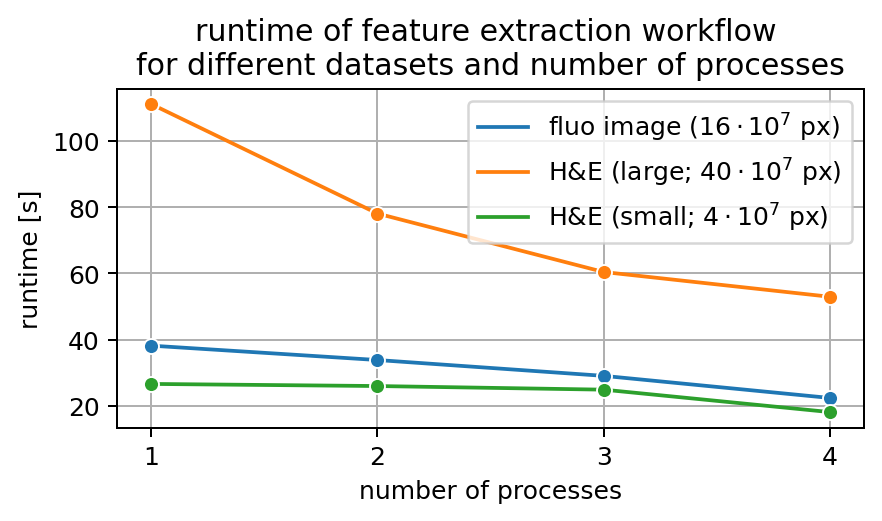

In [106]:
fig, ax = plt.subplots(1,1, figsize=(5,3), dpi=180, tight_layout=True)
sns.lineplot(data=df_grouped, hue='dataset', x='n_jobs', y='time', marker='o', ax=ax)
ax.set_xticks([1,2,3,4])
ax.set_ylabel("runtime [s]")
ax.set_xlabel("number of processes")
ax.get_legend().set_title(None)
plt.grid()
_ = ax.set_title("runtime of feature extraction workflow \nfor different datasets and number of processes")
plt.savefig('figures/benchmark_image.png')